In [2]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Customize the default figure size to 8x5 inches
plt.rcParams['figure.figsize'] = [8, 5]
# plt.rcParams stands for 'runtime configuration parameters' in Matplotlib. It is a dictionary-like object
# that stores default settings and styles for plots. These settings will be applied by default to all plots
# created in the current session unless explicitly overridden.

# Customize the default font size to 14 points
plt.rcParams['font.size'] = 14

# Customize the default font weight to bold
plt.rcParams['font.weight'] = 'bold'

# Apply the 'whitegrid' style from Seaborn to all plots in the current session
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\insurance (1).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

**Dataset Information**

- Dataset Shape: (1338, 7)
  - We have 1338 samples and 7 features.

**Variables**

- Target Variable: charges (medical charges)
- Independent Variables: age, sex, bmi, children, smoker, region

**Multiple Linear Regression**

- We use Multiple Linear Regression because there are multiple independent variables.
- The regression equation is:
  h(xi) = b0 + b1 * age + b2 * sex + b3 * bmi + b4 * children + b5 * smoker + b6 * region

**Example for Specific Data Points**

- For the first example (i=1):
  h(x1) = b0 + b1 * 19 + b2 * female + b3 * 27.9 + b4 * 0 + b5 * yes + b6 * southwest
  y1 = 16884.92400

- For the third example (i=3):
  h(x3) = b0 + b1 * 28 + b2 * male + b3 * 33.0 + b4 * 3 + b5 * no + b6 * northwest
  y3 = 4449.46200

**Note**: In Python, indices start from 0.

**Matrix Notation for the First Example**

x1 = [19, female, 27.9, 0, yes, southwest]

**Summary**

- 1338 samples with 7 features.
- Target variable: charges.
- Independent variables: age, sex, bmi, children, smoker, region.
- Use Multiple Linear Regression for prediction.


## Matrix Formulation

In general we can write above vector as $$ \mathbf{ x_{ij}} = \left( \begin{smallmatrix} \mathbf{x_{i1}} & \mathbf{x_{i2}} &.&.&.& \mathbf{x_{in}} \end{smallmatrix} \right)$$

Now we combine all aviable individual vector into single input matrix of size $(m,n)$ and denoted it by $\mathbf{X}$ input matrix, which consist of all training exaples,
$$\mathbf{X} = \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}$$

We represent parameter of function and dependent variable in vactor form as  
$$\theta = \left (\begin{matrix} \theta_0 \\ \theta_1 \\ .\\.\\ \theta_j\\.\\.\\ \theta_n \end {matrix}\right)_{(n+1,1)} 
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)_{(m,1)}$$

So we represent hypothesis function in vectorize form $$\mathbf{ h_\theta{(x)} = X\theta}$$.



Text(0.5, 1.0, 'Charge Vs BMI')

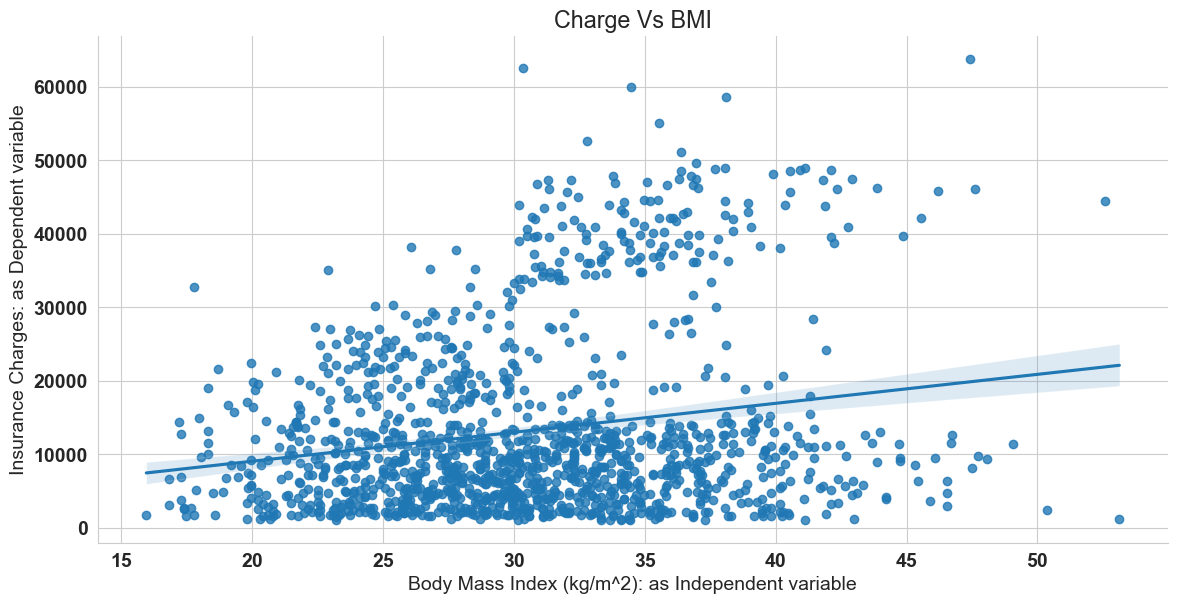

In [6]:
# For our visualization purpose, we'll fit a line using Seaborn library 
# only for bmi as independent variable and charges as dependent variable.

sns.lmplot(x='bmi', y='charges', data=df, aspect=2, height=6)

# Label for x-axis
plt.xlabel('Body Mass Index (kg/m^2): as Independent variable')

# Label for y-axis
plt.ylabel('Insurance Charges: as Dependent variable')


# Title of the plot
plt.title('Charge Vs BMI')


## Cost function

  A cost function measures how much error in the model is in terms of ability to estimate the relationship between $x$ and $y$. 
  We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.
  
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{J(\theta) =  \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$
To implement the linear regression, take training example add an extra column that is $x_0$ feature, where $\mathbf{x_0=1}$. $\mathbf{x_{o}} = \left( \begin{smallmatrix} x_{i0} & x_{i1} & x_{i2} &.&.&.& x_{mi} \end{smallmatrix} \right)$,where $\mathbf{x_{i0} =0}$ and input matrix will become as

$$\mathbf{X} = \left( \begin{smallmatrix} x_{10} & x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{20} & x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{30} & x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                 .&.&.&.&. &.&.&.& \\
                                 .&.&.&.&. &.&.&.& \\
                                x_{m0} & x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n+1)}$$  
Each of the m input samples is similarly a column vector with n+1 rows $x_0$ being 1 for our convenience, that is $\mathbf{x_{10},x_{20},x_{30} .... x_{m0} =1}$. Now we rewrite the ordinary least square cost function in matrix form as
$$\mathbf{J(\theta) = \frac{1}{m} (X\theta - y)^T(X\theta - y)}$$

Let's look at the matrix multiplication concept,the multiplication of two matrix happens only if number of column of firt matrix is equal to number of row of second matrix. Here input matrix $\mathbf{X}$ of size $\mathbf{(m,n+1)}$, parameter of function is of size $(n+1,1)$ and dependent variable vector of size $\mathbf{(m,1)}$. The product of matrix $\mathbf{X_{(m,n+1)}\theta_{(n+1,1)}}$ will return a vector of size $\mathbf{(m,1)}$, then product of $\mathbf{(X\theta - y)^T_{(1,m})(X\theta - y)_{(m,1)}}$ will return size of unit vector. 

## Normal Equation
The normal equation is an analytical solution to the linear regression problem with a ordinary least square cost function. To minimize our cost function, take partial derivative of $\mathbf{J(\theta)}$ with respect to $\theta$ and equate to $0$. The derivative of function is nothing but if a small change in input what would be the change in output of function.
 $$\mathbf{min_{\theta_0,\theta_1..\theta_n} J({\theta_0,\theta_1..\theta_n})}$$
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} =0}$$ 
 where $\mathbf{j = 0,1,2,....n}$
 
 Now we will apply partial derivative of our cost function,
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} = \frac{\partial }{\partial \theta} \frac{1}{m}(X\theta - y)^T(X\theta - y) }$$
 I will throw $\mathbf{\frac {1}{m}}$ part away since we are going to compare a derivative to $0$. And solve $\mathbf{J(\theta)}$,  
 
 $$\mathbf{J(\theta) = (X\theta -y)^T(X\theta - y)}$$
 $$\mathbf{= (X\theta)^T - y^T)(X\theta -y)}$$   
 $$\mathbf{= (\theta^T X^T - y^T)(X\theta - y)}$$
 $$\mathbf{= \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y}$$
 $$\mathbf{ = \theta^T X^T X \theta  - 2\theta^T X^T y + y^T y}$$

Here $\mathbf{y^T_{(1,m)} X_{(m,n+1)} \theta_{(n+1,1)} = \theta^T_{(1,n+1)} X^T_{(n+1,m)} y_{(m,1)}}$ because unit vector.

$$\mathbf{\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta} (\theta^T X^T X \theta  - 2\theta^T X^T y + y^T y )}$$
$$\mathbf{ = X^T X \frac {\partial \theta^T \theta}{\partial\theta} - 2 X^T y \frac{\partial \theta^T}{\partial\theta} + \frac {\partial y^T y}{\partial\theta}}$$
Partial derivative $\mathbf{\frac {\partial x^2}{\partial x} = 2x}$, $\mathbf{\frac {\partial kx^2}{\partial x} = kx}$,
$\mathbf{\frac {\partial Constact}{\partial x} = 0}$

$$\mathbf{\frac{\partial J(\theta)}{\partial\theta} = X^T X 2\theta - 2X^T y +0}$$
$$\mathbf{ 0 = 2X^T X \theta - 2X^T y}$$
$$\mathbf{ X^T X \theta = X^T }$$
$$\mathbf{ \theta = (X^TX)^{-1} X^Ty }$$

This the normal equation for linear regression

## EDA

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Checking for missing values**

Text(0.5, 1.0, 'Missing value in the dataset')

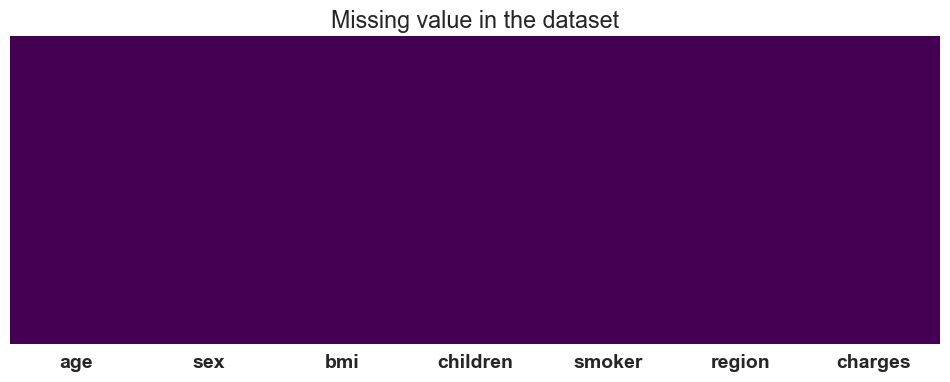

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

**There is no missing value in the data sex**

## Plots

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


<Axes: >

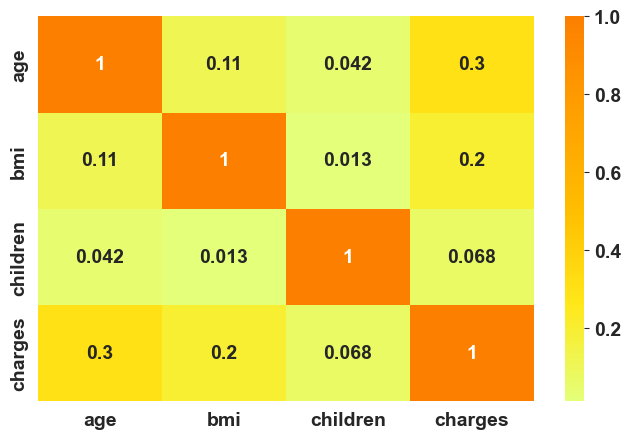

In [9]:
# Corelation Matrix

# Check data types to confirm which columns are numerical
print(df.dtypes)

# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(columns=['sex', 'smoker', 'region'])

# Compute the correlation matrix
corr = df_numeric.corr()

# Create the heatmap
sns.heatmap(corr, cmap='Wistia', annot=True)

**There is no corelation among variables**

C:\Users\Dell\AppData\Local\Temp\ipykernel_12888\824919996.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='r',ax=ax)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12888\824919996.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),bins=40,col

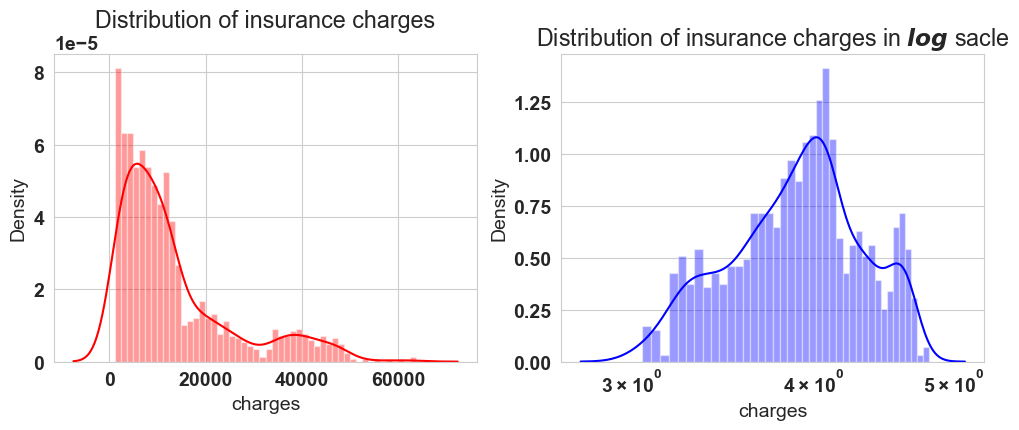

In [10]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

**the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal.<br> for further analysis we will apply log on target variable charges.**

C:\Users\Dell\AppData\Local\Temp\ipykernel_12888\2071011874.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges', data=df, palette='Wistia', ax=ax)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12888\2071011874.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges', data=df, palette='magma', ax=ax)


Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

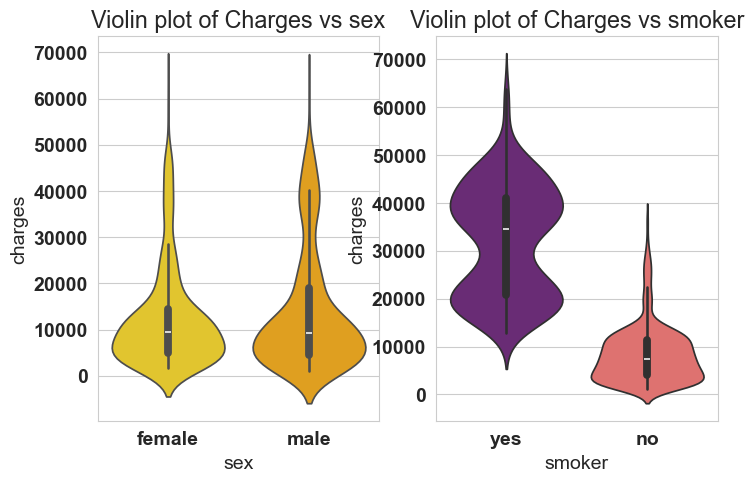

In [13]:
# Create a figure with a specific size (8 inches by 5 inches)
f = plt.figure(figsize=(8,5))

# Add the first subplot (121 means 1 row, 2 columns, first subplot)
ax = f.add_subplot(121)

# Create a violin plot for 'sex' vs 'charges' using the Wistia color palette
sns.violinplot(x='sex', y='charges', data=df, palette='Wistia', ax=ax)

# Set the title for the first plot
ax.set_title('Violin plot of Charges vs sex')

# Add the second subplot (122 means 1 row, 2 columns, second subplot)
ax = f.add_subplot(122)

# Create a violin plot for 'smoker' vs 'charges' using the magma color palette
sns.violinplot(x='smoker', y='charges', data=df, palette='magma', ax=ax)

# Set the title for the second plot
ax.set_title('Violin plot of Charges vs smoker')


# From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. 
# In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks.
# For smoker the minimum insurance charge is itself 5000 bucks.

Text(0.5, 1.0, 'Box plot of charges vs children')

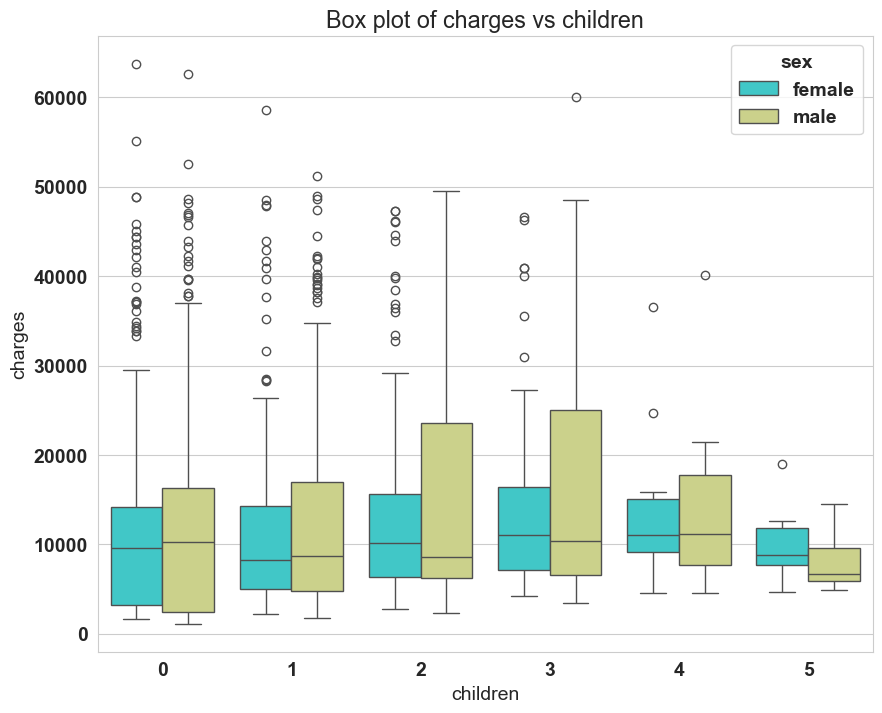

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children')

Text(0.5, 1.0, 'Violin plot of charges vs children')

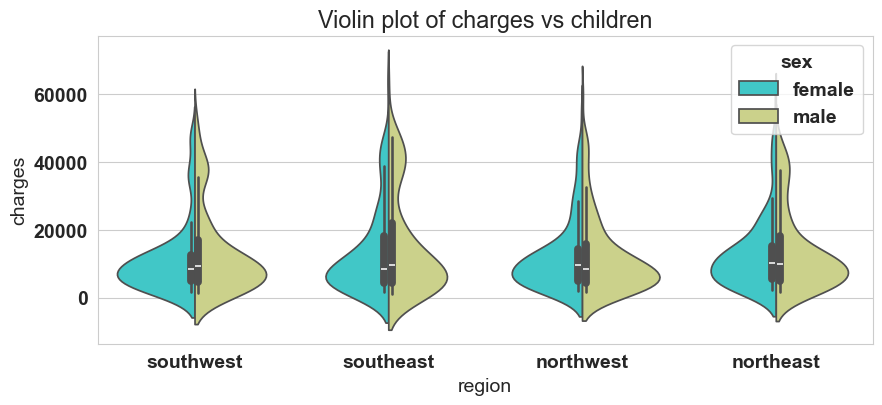

In [20]:
plt.figure(figsize=(10,4))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children')

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

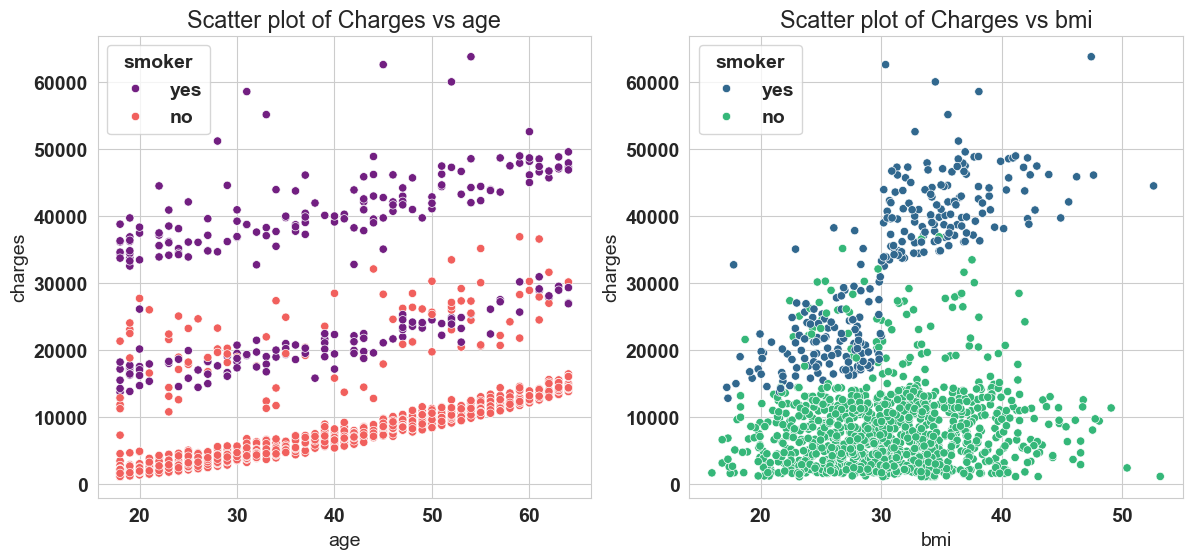

In [21]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')

>From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take $1^{st}$ and $2^{nd}$ slab, for smoker policy start at $2^{nd}$ and $3^{rd}$ slab.

>Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16$kg/m^2$ and maximum upto 54$kg/m^2$

## Data Preprocessing
### Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.
 1. Label Encoding
 2. One hot encoding
 3. Dummy variable trap

**Label encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A **One hot encoding** is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The **Dummy variable trap** is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using *pandas get_dummies* function we can do all above three step in line of code. We will this fuction  to get dummy variable for sex, children,smoker,region features. By setting *drop_first =True* function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.1

In [22]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [23]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


### Box -Cox transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.  
$$\mathbf{ \begin {cases}\frac {y^\lambda - 1}{\lambda},& y_i\neg=0 \\
 log(y_i) & \lambda = 0 \end{cases}}$$
 The trick of Box-Cox transformation is to find lambda value, however in practice this is quite affordable. The following function returns the transformed variable, lambda value,confidence interval

In [24]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

((-0.011402906172966682, 0.09880968597671798), 0.043649061187374535)

In [25]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

The original categorical variable are remove and also one of the one hot encode varible column for perticular categorical variable is droped from the column. So we completed all three encoding step by using get dummies function.

**Train Test split**

In [27]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

**Model building**<br>
In this step build model using our linear regression equation $\mathbf{\theta = (X^T X)^{-1} X^Ty}$. In first step we need to add a feature $\mathbf{x_0 =1}$ to our original data set. 

In [28]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [29]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [30]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


The parameter obtained from both the model are same.So we succefull build our model using normal equation and verified using sklearn linear regression module. Let's move ahead, next step is prediction and model evaluvation.

## Model evaluation
We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute **Mean Square Error** using formula 
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$

$\mathbf{R^2}$ is statistical measure of how close data are to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Sum of Square Error**  
**SST = Sum of Square Total**  
$$\mathbf{SSE = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$
Here $\mathbf{\hat{y}}$ is predicted value and $\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$.

In [31]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981987
R square obtain for normal equation method is : 0.7795687545055308


In [32]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981895
R square obtain for scikit learn library is : 0.7795687545055319


The Mean Square Error(MSE) or J(theta) is:  0.1872962232298189
R square obtain for scikit learn library is : 0.7795687545055318
The model returns 
 value of 77.95%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique. Please make a note that we have transformer out variable by applying natural log. When we put model into production antilog is applied to the equation.

**Model Validation**


1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no *Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor *VIF* identifies correlation between independent variables and strength of that correlation. $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

Text(0.5, 1.0, 'Check for Residual Normality & Mean: \n Residual Error')

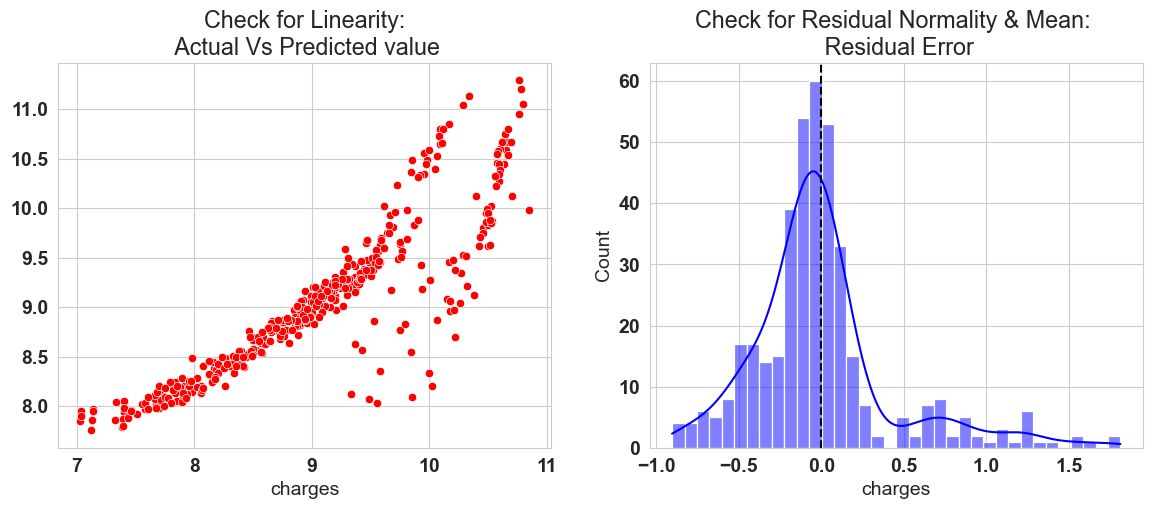

In [34]:
# Check for Linearity
f = plt.figure(figsize=(14,5))

# Plot 1: Check for Linearity
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk, ax=ax, color='r')  # Specify x and y explicitly for better compatibility
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Plot 2: Check for Residual Normality & Mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_sk), kde=True, ax=ax, color='b')  # Use sns.histplot() instead of sns.distplot()
ax.axvline((y_test - y_pred_sk).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual Normality & Mean: \n Residual Error')


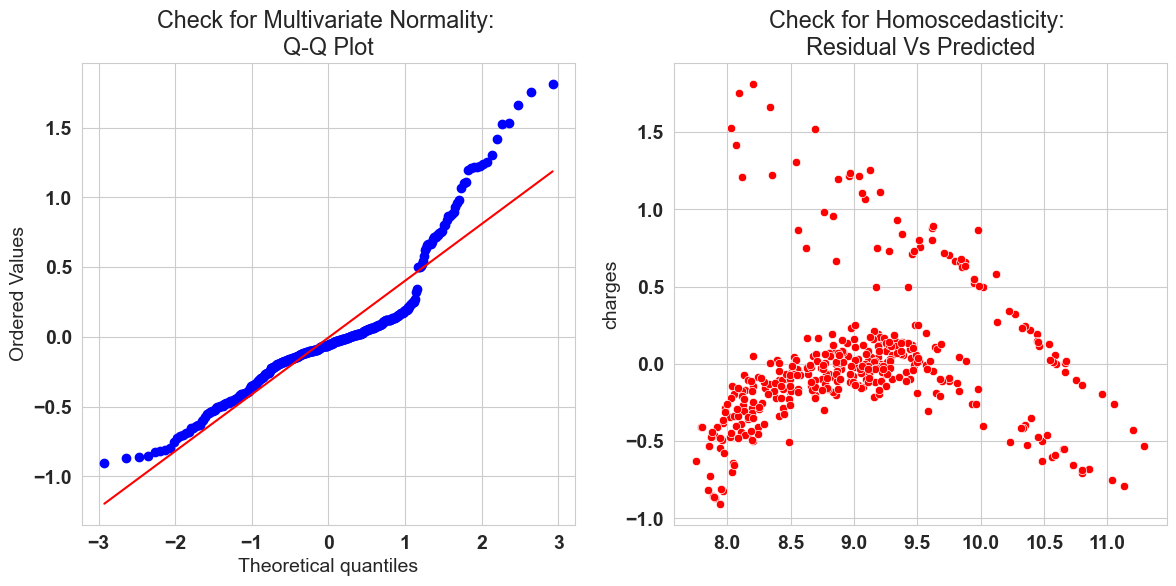

In [35]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [36]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911138